#**REDES NEURONALES CONVULCIONALES Y RECURRENTES**

##**RED NEURONAL CONVULSIONAL**

####**Red Neuronal Convulsional (CNN)**

Una CNN está diseñada para aprovechar la estructura espacial de datos (principalmente imágenes, pero también cualquier dato con relación topológica: mapas, sensores 2D/3D).

> En vez de tratar cada píxel como una entrada independiente, una CNN aplica operaciones locales (convoluciones) que detectan patrones locales — bordes, texturas, partes de objetos — y las combina progresivamente para formar representaciones de mayor nivel (objetos completos).

Esto reduce drásticamente la cantidad de parámetros comparado con una red totalmente conectada y captura invarianzas espaciales (por ejemplo, reconocer un objeto aunque esté desplazado).

####**Cómo funciona?**

1. **Capa Conv (filtros/kernels):** cada filtro es una pequeña matriz que “se desliza” sobre la imagen y calcula productos internos locales. El resultado es un feature map que responde fuertemente cuando aparece el patrón que el filtro ha aprendido.

2. **No linealidad:** tras la convolución se aplica una función de activación (ReLU, por ejemplo) para introducir no linealidad.

3. **Pooling (submuestreo):** operaciones como max-pooling reducen la resolución espacial de los mapas, preservando características importantes y otorgando tolerancia a pequeñas traslaciones.

4. **Capas profundas:** capas sucesivas aprenden combinaciones de características más complejas (de bordes → texturas → partes → objeto).

5. **Capas densas finales:** después de extraer características se usan capas totalmente conectadas para la decisión final (clasificación/regresión).

6. **Entrenamiento:** durante backpropagation TF calcula gradientes de la pérdida respecto a los filtros y actualiza pesos con un optimizador (Adam, SGD). Las convoluciones son diferenciables; por eso los filtros se aprenden automáticamente.

####**Analogía útil**

**Piensen en una CNN como en un laboratorio de análisis visual:**

* Los primeros técnicos (capas iniciales) están especializados en detectar rasgos básicos — bordes y texturas — como microscopistas que reconocen células.

* Técnicos posteriores combinan esos rasgos y construyen diagnósticos más complejos — órganos o patologías — de la misma muestra.

* El pooling sería como tomar una muestra resumida (resumen estadístico) para acelerar el análisis sin perder las características más relevantes.

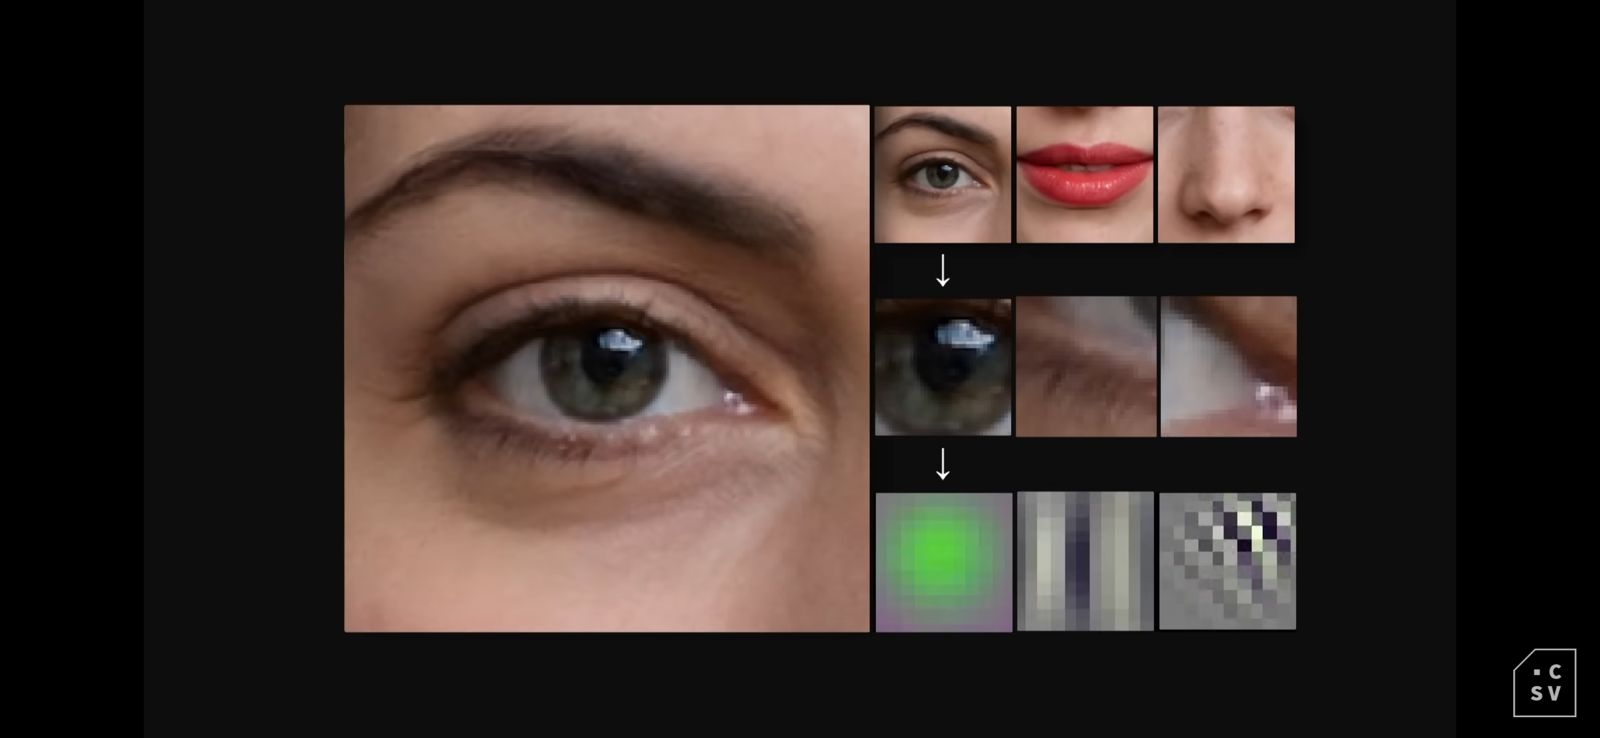

###**Filtro de convulsion**

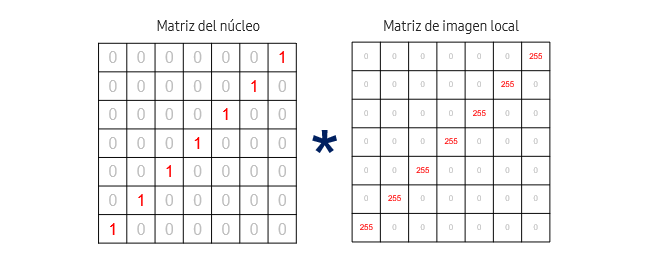

*7X255=1785 pixeles que coinciden*

###**Capa de convulsion**

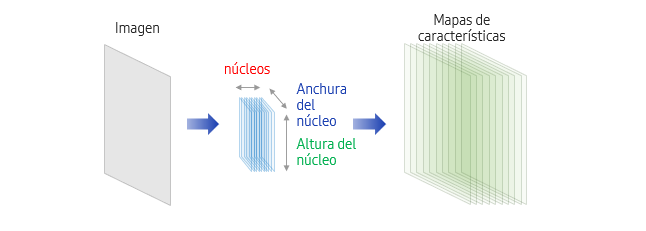

###**Agrupacion (submuestreo)**

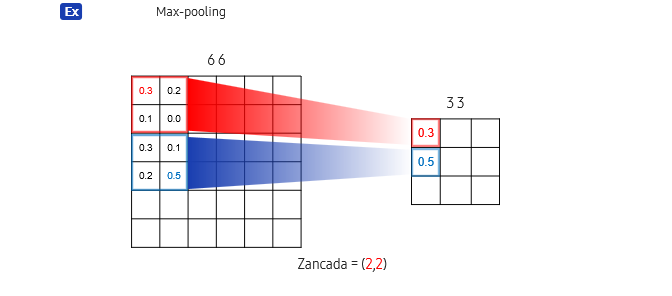

###**Diagrama de una red neuronal convulsional**

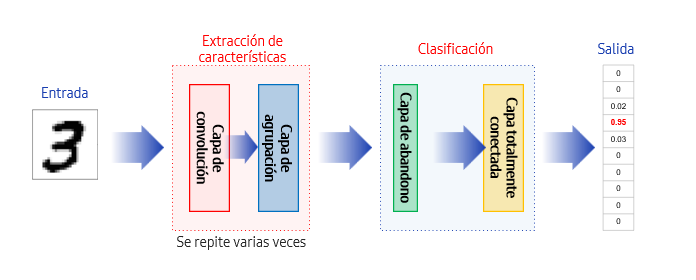

###**Componentes de la red neuronal convulsional**

####**DMLP Y CNN**

> **DMLP:** Un DMLP es una red neuronal totalmente conectada.
Esto significa que cada neurona de una capa se conecta con todas las neuronas de la capa siguiente.

> **CNN:** Una CNN NO conecta todas las neuronas entre capas.
En su lugar, utiliza conexiones locales, lo que se llama campo receptivo.

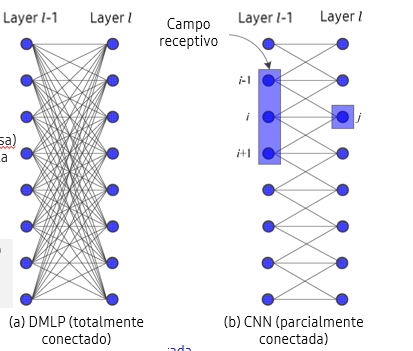

###**Operacion de convulsion**

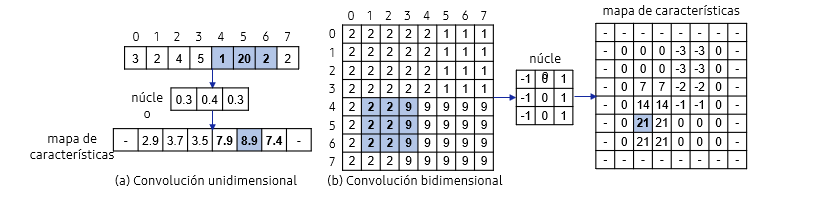

###**Acolchado**

**La operacion en el borde de los datos es imposible, ya que el nucleo sobresale fuera del area de los datos.**

> En la imagen anterior, las areas imposibles de operar se denotan con -. Si el tamano de un nucleo es h, y h es 3, el numero de los nodos pasa a ser 2 en el borde. En las redes neuronales profundas, las capas de convolucion se repiten
varias veces.

**Entonces, algunos nodos se omiten en gran medida.**

**Para evitar este problema, realiza lo que se llama relleno**, como se muestra a continuacion. Rellena una cantidad necesaria de 0 o duplica el valor del nodo adyacente.

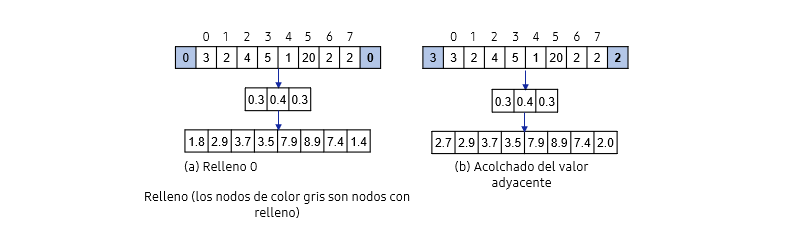

###**Convulsion discreta**

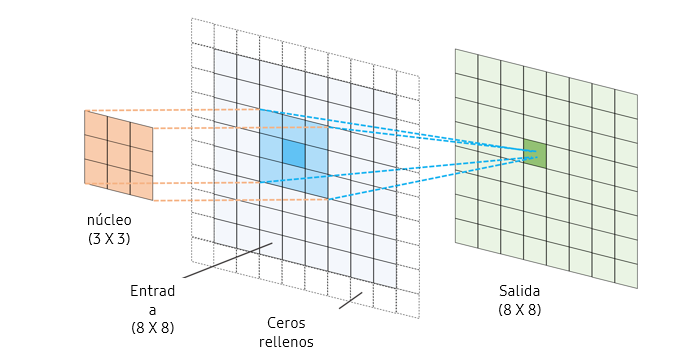

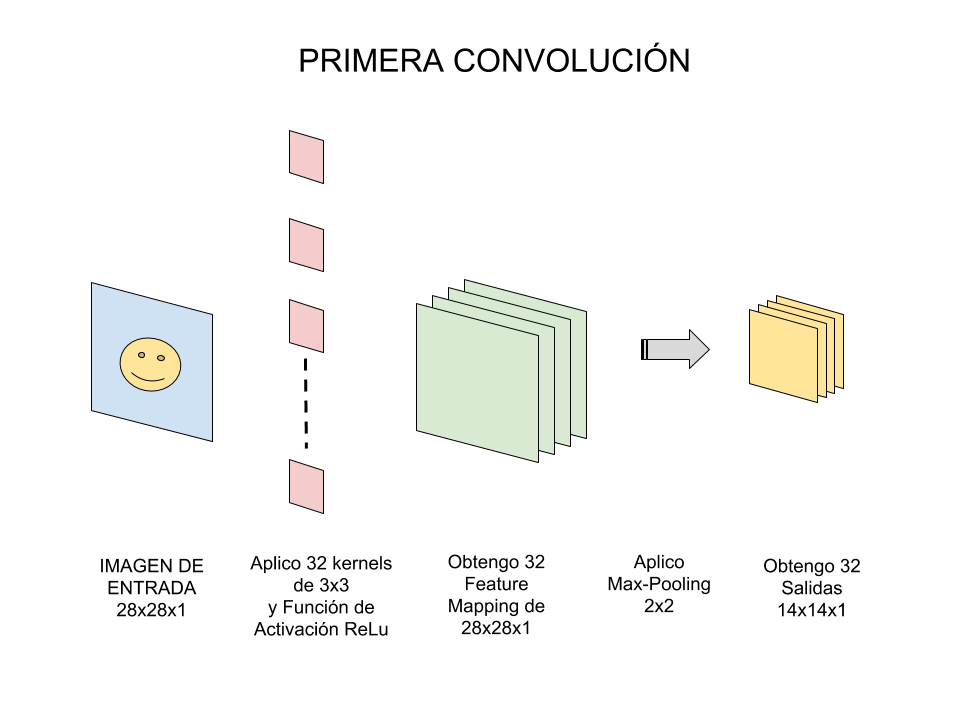

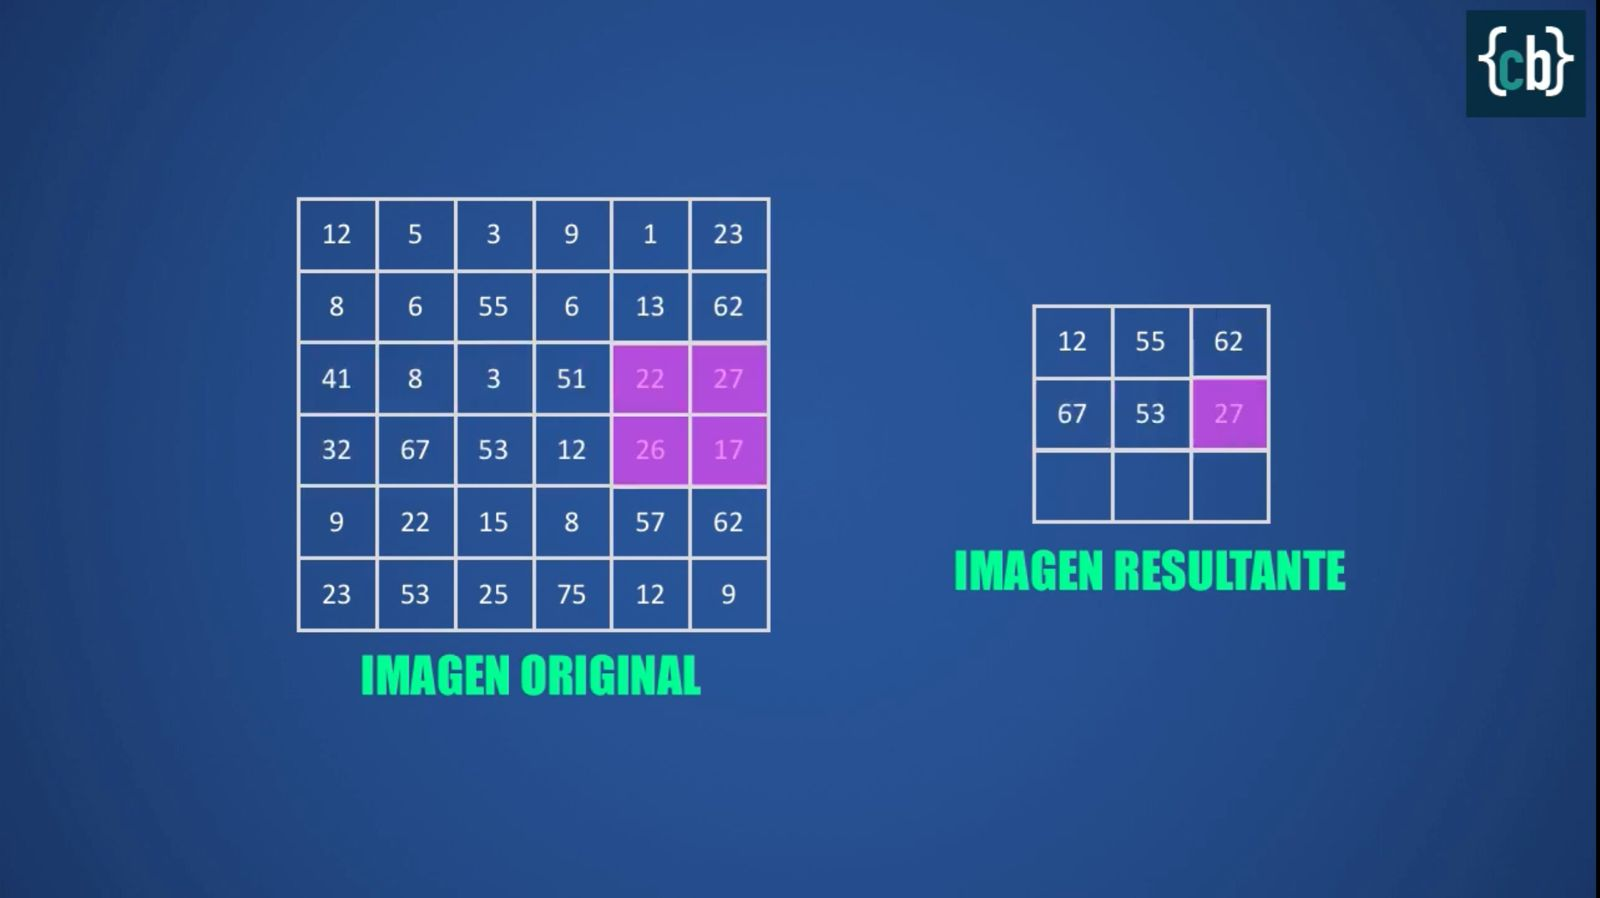

In [ ]:
import numpy as np

def conv2d_discreta(X, W, padding=(0, 0), stride=(1, 1)):
    """
    Convolución 2D discreta entre una imagen X y un kernel W.
    X: array 2D (h, w)
    W: array 2D (kh, kw)
    padding: (pad_h, pad_w)
    stride: (stride_h, stride_w)
    """

    # Aseguramos que son arrays NumPy
    X = np.array(X, dtype=float)
    W = np.array(W, dtype=float)

    # Volteamos el kernel para que sea convolución y no correlación
    W_rot = W[::-1, ::-1]

    pad_h, pad_w = padding
    s_h, s_w = stride

    # Imagen con padding de ceros
    H_in, W_in = X.shape
    H_k, W_k = W_rot.shape

    H_pad = H_in + 2 * pad_h
    W_pad = W_in + 2 * pad_w

    X_padded = np.zeros((H_pad, W_pad), dtype=float)
    X_padded[pad_h:pad_h + H_in, pad_w:pad_w + W_in] = X

    # Tamaño de la salida
    H_out = int((H_pad - H_k) / s_h) + 1
    W_out = int((W_pad - W_k) / s_w) + 1

    out = np.zeros((H_out, W_out), dtype=float)

    # Convolución discreta
    for i in range(0, H_out):
        for j in range(0, W_out):
            i_start = i * s_h
            j_start = j * s_w
            X_sub = X_padded[i_start:i_start + H_k, j_start:j_start + W_k]
            out[i, j] = np.sum(X_sub * W_rot)

    return out

###**Regularizacion para evitar sobreajuste**

* L2 (weight decay)

* L1

* L1 + L2 (L1L2)

* Dropout

* Early Stopping

* Data augmentation (a nivel de datos, no de pesos).


###**¿Qué es la penalización L2?**

La regularización L2 añade un término a la función de pérdida:

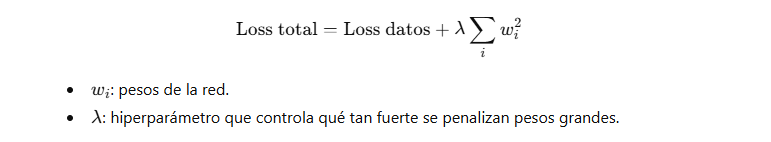

####**Efectos:**

* Empuja los pesos hacia valores pequeños (pero no exactamente cero).

* Reduce el sobreajuste porque evita pesos enormes que se adaptan demasiado al conjunto de entrenamiento.

* En Keras, kernel_regularizer=keras.regularizers.l2 (0.001) significa
𝜆 =0.001

####**Ejemplo muy simple:**


Supón que sin regularización la mejor solución da un peso w=10.

Con L2, tener w=10 cuesta caro (102 = 100 10 2 =100), así que el modelo prefiere algo como w=2 con un error de datos un poquito mayor, pero una pérdida total menor.

In [ ]:
from tensorflow import keras

# Regularización L2 en una capa convolucional
conv_layer = keras.layers.Conv2D(
    filters=16,
    kernel_size=(3, 3),
    padding="same",
    activation="relu",
    kernel_regularizer=keras.regularizers.l2(0.001)
)

# Regularización L2 en una capa densa
fc_layer = keras.layers.Dense(
    units=16,
    activation="relu",
    kernel_regularizer=keras.regularizers.l2(0.001)
)

# L1
dense_l1 = keras.layers.Dense(
    units=16,
    activation="relu",
    kernel_regularizer=keras.regularizers.l1(0.001)
)

# L1 + L2
dense_l1_l2 = keras.layers.Dense(
    units=16,
    activation="relu",
    kernel_regularizer=keras.regularizers.l1_l2(l1=0.001, l2=0.001)
)

# Dropout
drop = keras.layers.Dropout(0.5)


###**Funciones de Perdida**

###**Qué es Cross Entropy (entropía cruzada)**

Cross Entropy es una medida que compara dos distribuciones de probabilidad:

> La distribución real (las etiquetas verdaderas).

>  distribución que predice el modelo.

* Sirve para medir qué tan “mal” o “bien” está prediciendo el modelo.
* Si la predicción se acerca mucho a la etiqueta correcta, la entropía cruzada es baja.
* Si la predicción está lejos, la entropía cruzada es alta.

Es una medida estándar en clasificación porque penaliza fuertemente cuando el modelo se equivoca estando muy seguro.

**En Python/TensorFlow se llama:**

In [ ]:
tf.keras.losses.CategoricalCrossentropy
tf.keras.losses.BinaryCrossentropy
tf.keras.losses.SparseCategoricalCrossentropy

###**Qué es Binary Cross Entropy**

Se usa para tareas de clasificación binaria: dos clases (0 o 1).

**Ejemplos:**

* detectar si un correo es spam o no

* clasificar si una imagen contiene un gato o no

* predicción de una etiqueta sí/no

**La función compara la probabilidad predicha de la clase positiva contra la etiqueta real.**

Se espera que el modelo produzca un número entre 0 y 1, que representa la probabilidad de la clase “1”.

Un error grave ocurre cuando el modelo predice algo muy cercano a 0 para un dato que realmente es 1, o muy cercano a 1 para algo que es 0.

**En Python/TensorFlow:**

In [ ]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

#Si tu última capa no usa sigmoide, sino que produce logits, se usa:

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

###**Qué es Categorical Cross Entropy**

Se usa para clasificación multiclase cuando las etiquetas están codificadas en one-hot.

**Ejemplos:**

* clasificar imágenes entre 10 dígitos (MNIST)

* clasificar objetos entre varias categorías

* identificar el tipo de animal en una foto

**Una etiqueta one-hot significa:**

* Para 3 clases, la clase 1 sería [0,1,0]

* Para 10 clases, la clase “3” sería [0,0,0,1,0,0,0,0,0,0]

**La función compara la distribución verdadera (one-hot) con la distribución predicha (probabilidades softmax).**

**En Python/TensorFlow:**

In [ ]:
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=False)

#Si el modelo produce logits sin softmax:

loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

###**Qué es Sparse Categorical Cross Entropy**

Es igual que la categorical cross entropy, pero la etiqueta es un número entero en lugar de un vector one-hot.

**Por ejemplo, para la clase 3:**

categorical necesita [0,0,0,1,0,0,0,0,0,0]

sparse categorical usa simplemente 3

**En Python:**

In [ ]:
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)

###**Resumen corto**

* Cross Entropy: mide qué tan buena es la predicción de probabilidades de un modelo.

* Binary Cross Entropy: para 2 clases (0 y 1).

* Categorical Cross Entropy: para más de 2 clases con etiquetas one-hot.

* Sparse Categorical Cross Entropy: para más de 2 clases con etiquetas enteras.

###**Construccion de Redes Neuronales Multicapa**

Clasificar imágenes de CIFAR-10 (10 clases).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Cargar dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0
y_train = y_train.squeeze()
y_test  = y_test.squeeze()

# Modelo CNN
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

# Entrenamiento
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)
print("Evaluación:", model.evaluate(x_test, y_test))


Uso del dataset MNIST

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# 1. Cargar el dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalizar a rango [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Aplanar imágenes: 28x28 -> 784
x_train = x_train.reshape(-1, 784)
x_test  = x_test.reshape(-1, 784)

# 2. Modelo MLP (Perceptron Multicapa)

model = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')  # 10 clases (0–9)
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar arquitectura
model.summary()

# 3. Entrenamiento

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

# 4. Evaluación en el set de prueba

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Evaluación en test — Pérdida: {test_loss:.4f}, Exactitud: {test_acc:.4f}")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,298 (954.29 KB)

 Trainable params: 243,530 (951.29 KB)

 Non-trainable params: 768 (3.00 KB)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8151 - loss: 0.6132 - val_accuracy: 0.9660 - val_loss: 0.1055
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9446 - loss: 0.1805 - val_accuracy: 0.9725 - val_loss: 0.0919
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9553 - loss: 0.1416 - val_accuracy: 0.9785 - val_loss: 0.0692
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9638 - loss: 0.1183 - val_accuracy: 0.9768 - val_loss: 0.0762
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9671 - loss: 0.1084 - val_accuracy: 0.9813 - val_loss: 0.0657
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9693 - loss: 0.0969 - val_accuracy: 0.9823 - val_loss: 0.0648
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9718 - loss: 0.0870 - val_accuracy: 0.9810 - val_loss: 0.0628
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9733 - loss: 0.0859 - val_accuracy

---

##**Red Neuronal Recurrente (RNN)**

Una RNN está diseñada para capturar dependencias temporales o secuenciales en datos donde el orden importa: texto, audio, series de tiempo, vídeo (como secuencia). A diferencia de una red feed-forward (donde cada entrada se procesa independientemente), una RNN mantiene un estado oculto que se actualiza paso a paso, permitiendo que la salida en un tiempo t dependa de entradas pasadas.

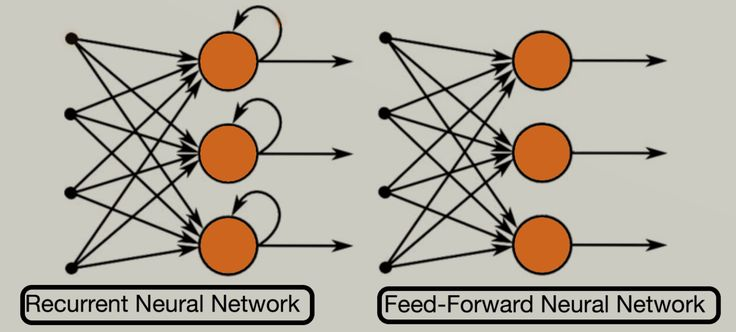

####**Cómo funciona?**

1. **Procesamiento secuencial:** la RNN procesa una secuencia
𝑥
1
,
𝑥
2
,
…
,
𝑥
𝑇
x
1

.

**En cada paso: t actualiza su estado oculto**

ℎ
𝑡
= 𝑓
(
ℎ
𝑡
−
1
,
𝑥
𝑡
)

.

2. **Estado oculto = memoria:**

ℎ
𝑡

Esta resume lo relevante de lo visto hasta ese momento; esto permite modelar dependencias a corto plazo.

3. **Retropropagación a través del tiempo (BPTT):** el gradiente fluye no sólo a través de capas, sino a través del tiempo; así se ajustan los parámetros para tener en cuenta contribuciones de pasos anteriores.

4. **Problema del gradiente (vanishing/exploding):** en secuencias largas los gradientes pueden desaparecer o explotar; esto dificulta aprender dependencias de largo alcance.

5. **LSTM/GRU:** arquitecturas recurrentes mejoradas (LSTM = Long Short-Term Memory) introducen puertas (input, forget, output) que controlan el flujo de información y permiten recordar o olvidar contenido, mitigando el problema del gradiente y capturando dependencias más largas.

###**Analogia**

**Imaginen un editor humano que lee un documento línea por línea:**

* El estado oculto es la nota mental que guarda el lector (qué contexto es importante).

* A cada línea nueva, el lector decide qué recordar (olvidar lo irrelevante) y qué anotar (recordar para usar después).

* El LSTM es un lector disciplinado con reglas claras para cuánto y cómo recordar (puertas).

**Ejemplo**

Clasificar sentimiento en IMDB (texto) usando Embedding + LSTM para ilustrar cómo la RNN maneja secuencias de texto.

In [ ]:
# Instalaciones necesarias
!pip install tensorflow

# Cargar dataset real IMDB

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import sequence

# Se cargan los textos ya tokenizados (palabras convertidas a números)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

# Parámetros
tamaño_vocabulario = 10000
longitud_oracion = 200

# Preprocesamiento: padding
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=longitud_oracion)
x_test  = tf.keras.preprocessing.sequence.pad_sequences(x_test,  maxlen=longitud_oracion)

# Construir modelo RNN
modelo = models.Sequential([
    layers.Embedding(input_dim=tamaño_vocabulario, output_dim=64, input_length=longitud_oracion),
    layers.SimpleRNN(64),
    layers.Dense(1, activation="sigmoid")
])

modelo.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

modelo.summary()

# Entrenar modelo
historial = modelo.fit(
    x_train, y_train,
    epochs=3,
    batch_size=64,
    validation_split=0.2
)

# Evaluar modelo

loss, acc = modelo.evaluate(x_test, y_test)
print("\nAccuracy de prueba:", acc)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 69ms/step - accuracy: 0.5662 - loss: 0.6604 - val_accuracy: 0.6492 - val_loss: 0.6171
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 65ms/step - accuracy: 0.7724 - loss: 0.4795 - val_accuracy: 0.7854 - val_loss: 0.4780
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 69ms/step - accuracy: 0.9221 - loss: 0.2048 - val_accuracy: 0.8084 - val_loss: 0.4759
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8035 - loss: 0.4872

Accuracy de prueba: 0.8026400208473206


###**QUE ES ADAM OPTIMIZADO?**

**Adam es un optimizador usado para entrenar redes neuronales.**
Su tarea es actualizar los pesos del modelo en cada iteración para que la red aprenda.

**Para entenderlo mejor:**

Un optimizador es el algoritmo que ajusta los pesos de una red neuronal para reducir la función de pérdida. Adam es uno de los optimizadores más usados porque combina dos ideas: momentum y RMSProp.

Momentum hace que las actualizaciones no dependan solo del gradiente actual, sino también de gradientes previos. Esto ayuda a avanzar de manera más estable y evita que el entrenamiento haga movimientos bruscos o se quede atrapado en pequeñas irregularidades.

RMSProp ajusta automáticamente el tamaño del paso (learning rate) para cada peso. Si un peso presenta gradientes muy grandes o muy variables, la actualización se vuelve más pequeña. Si el gradiente es estable, la actualización se vuelve más grande. Esto hace que el entrenamiento sea más eficiente y menos sensible a la elección del learning rate inicial.

**Adam combina ambas ideas. En cada iteración:**

* Calcula el gradiente del error.

* Mantiene una media móvil de los gradientes pasados.

* Mantiene una media móvil del cuadrado de los gradientes.

* Corrige esos valores para evitar sesgos.

* Usa esa información para actualizar cada peso con un paso adaptativo.

El resultado es un método que converge rápido, es estable y funciona bien en la mayoría de los problemas sin necesidad de ajustar muchos parámetros. Por eso se usa como opción por defecto en la mayoría de modelos.

###**Extra**

**Dominio de aplicación:**

* CNN → datos con estructura espacial.
* RNN → datos con estructura temporal/secuencial.

**Mecanismo de memoria:**

* CNN no mantiene memoria temporal; su “contexto” es espacial (receptive field).
* RNN mantiene estado temporal que se actualiza en cada paso.

**Arquitectura típica:**

* CNN → convoluciones + pooling + capas densas.
* RNN → embedding (si texto) + RNN/LSTM/GRU + capas densas.

**Problemas típicos:**

* CNN → overfitting, necesidad de augmentations y arquitectura correcta.
* RNN → vanishing/exploding gradients en secuencias largas; LSTM/GRU y atención mitigan esto.

**Evolución práctica:**

Para NLP moderno muchas tareas que antes usaban RNN ahora usan Transformers (mecanismo de atención) por su paralelismo y capacidad de modelar dependencias largas; sin embargo, RNN/LSTM siguen siendo pedagógicos y útiles en series de tiempo.